<a href="https://colab.research.google.com/github/MoMahmoud8/ASDC/blob/main/Customers%20Segmentation/Customers_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df=pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
encoded_data = pd.get_dummies(df['Gender'])

# Concatenate the encoded data with the original dataframe
newdf= pd.concat([df, encoded_data], axis=1)
newdf.drop(columns=['CustomerID','Gender','Female'],inplace=True,axis=1)
newdf.rename(columns={"Male":'Gender'},inplace=True)
newdf
#Male:1 Female:0

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


<Axes: >

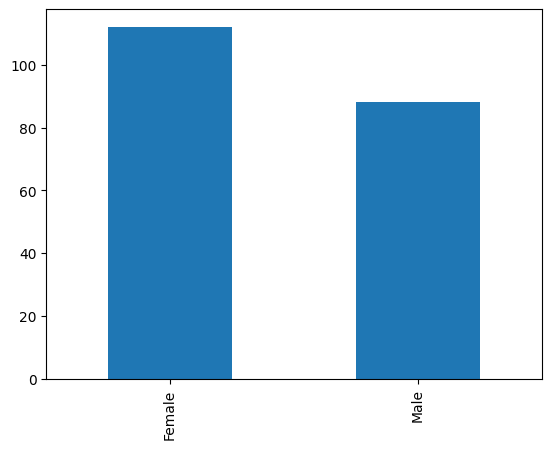

In [37]:
df.Gender.value_counts().plot.bar()

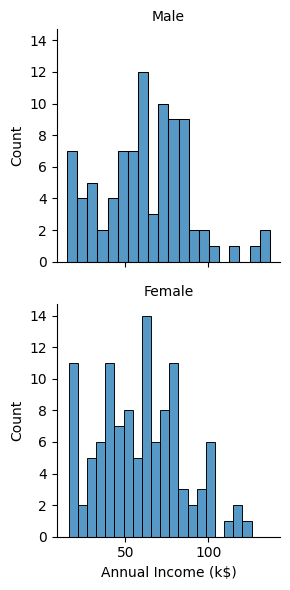

In [38]:
# sns.histplot(data=df,x='Annual Income (k$)',hue='Gender',bins=20)
g = sns.FacetGrid(df, row='Gender')

# Plot histogram for each gender
g.map(sns.histplot, 'Annual Income (k$)', bins=20)

# Set the titles for each subplot
g.set_titles("{row_name}")

# Display the plot
plt.show()

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

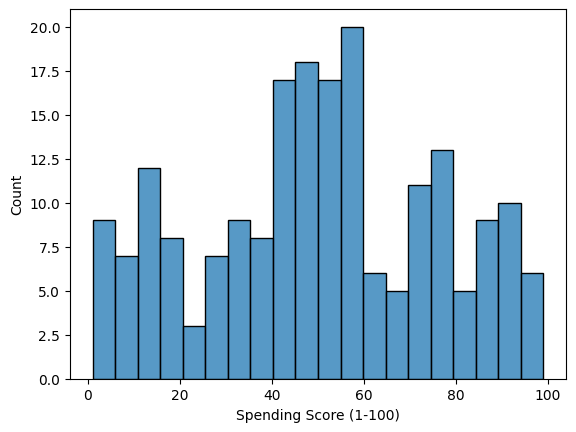

In [23]:
sns.histplot(df['Spending Score (1-100)'],bins=20)

<Axes: xlabel='Age', ylabel='Count'>

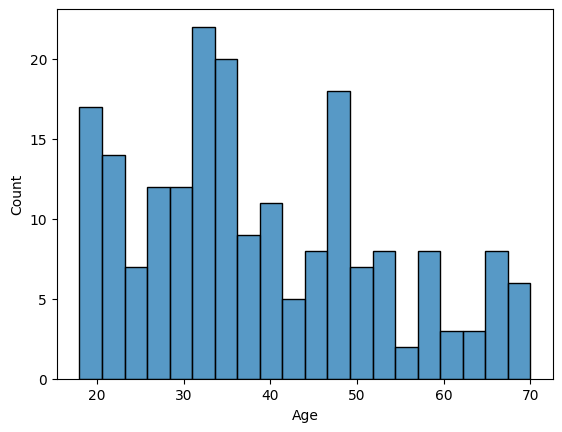

In [24]:
sns.histplot(df['Age'],bins=20)

<Axes: >

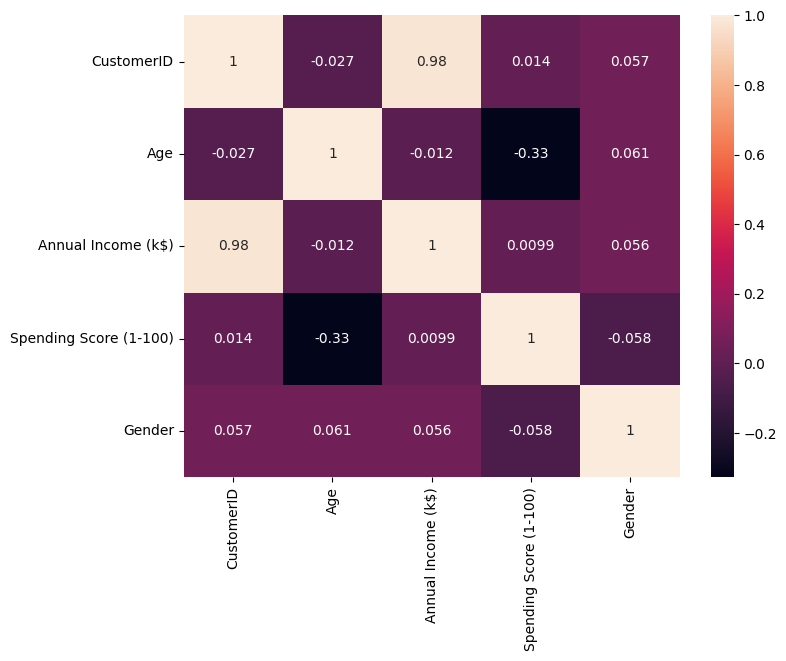

In [25]:
#Correlation of the Features
plt.figure(figsize=(8,6))
sns.heatmap(newdf.corr(), annot=True)


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

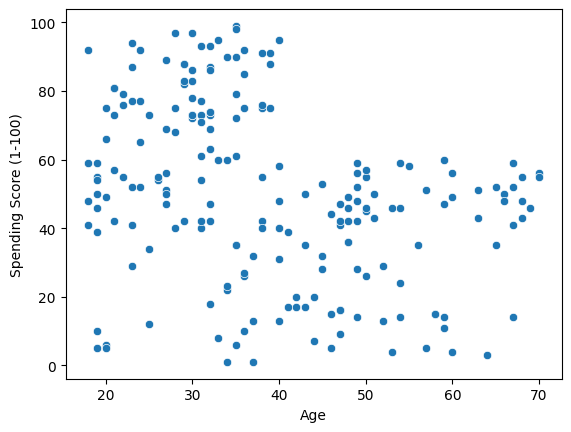

In [26]:
sns.scatterplot(data=df,x='Age',y='Spending Score (1-100)')

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(newdf)
df_scaled = pd.DataFrame(df_scaled, columns=newdf.columns)
df_scaled


,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

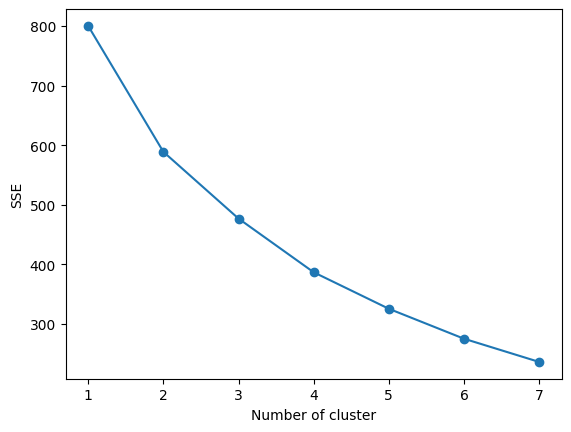

In [40]:
from sklearn.cluster import KMeans

n_clusters = 7

inertias = []

for n in range(1 , n_clusters+1):

    kmean= KMeans(n, random_state=0)

    kmean.fit(df_scaled)

    inertias.append(kmean.inertia_)

plt.plot(range(1 , n_clusters+1), inertias, '-o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [41]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df_scaled)


In [56]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_
centers

array([[-0.75277339,  0.00262858,  0.74265245, -0.05565994],
       [ 0.70892251, -0.00247545, -0.69939115,  0.05241761]])

In [43]:
y_kmeans

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [46]:
newdf[y_kmeans == False]['Age']

0      19
1      21
3      23
4      31
5      22
       ..
191    32
193    38
195    35
197    32
199    30
Name: Age, Length: 97, dtype: int64

In [50]:
newdf.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender'], dtype='object')

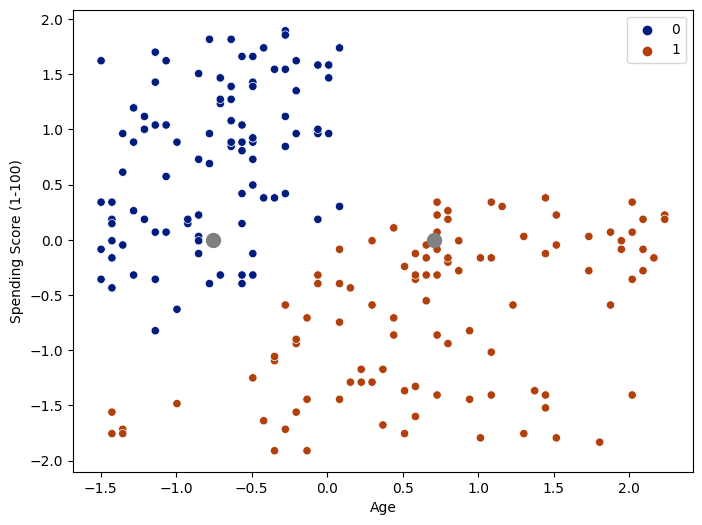

In [55]:
plt.figure(figsize=(8,6))

ax = sns.scatterplot(x= df_scaled["Age"], y= df_scaled["Spending Score (1-100)"], hue = labels, data = df_scaled, palette='dark')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'grey', label = 'Centroids')

plt.show()



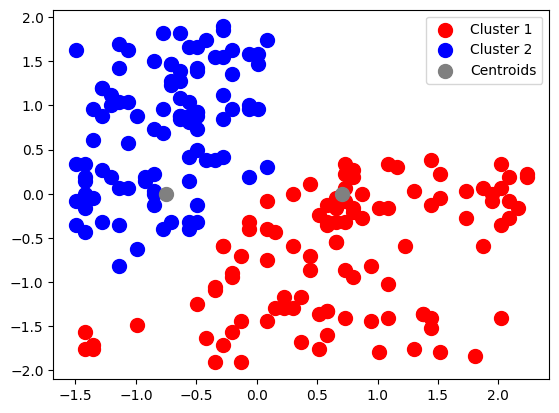

In [49]:
plt.scatter(df_scaled[y_kmeans == True]['Age'], df_scaled[y_kmeans == True]["Spending Score (1-100)"],
            s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df_scaled[y_kmeans == False]['Age'], df_scaled[y_kmeans == False]["Spending Score (1-100)"],
            s = 100, c = 'blue', label = 'Cluster 2')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'grey', label = 'Centroids')

plt.legend()
